In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import kstest
import numpy as np

# Read bed files and preprocess

Read in the bed files

In [450]:
TEs_df = pd.read_csv('D:/TEs_CoTEs_pipline/data/V2-TEs/non_olap/TEs/1061_MER65A_Merged.bed',delimiter='\t',header=None)
CoTE_df=pd.read_csv('D:/TEs_CoTEs_pipline/data/V2-TEs/non_olap/cores1000/1061_MER65A_Merged.bed',delimiter='\t',header=None)

In [451]:
TEs_df

0         1         2  3
0     chr1   1575524   1575713  1
1     chr1   1576011   1576231  1
2     chr1   1586153   1586206  1
3     chr1   1586803   1586902  1
4     chr1   1587825   1587894  1
...    ...       ...       ... ..
1480  chrY   3000179   3000392  1
1481  chrY  11243865  11244372  1
1482  chrY  12218536  12218735  1
1483  chrY  13514323  13514403  1
1484  chrY  13520437  13520723  1

[1485 rows x 4 columns]

In [452]:
CoTE_df

0          1          2
0                   chr1   12833080   13408404
1                  chr14  103345005  106409564
2   chr14_KI270846v1_alt     287615    1147889
3                  chr19   38759647   48250535
4                   chr5   21304493   28418689
5                  chr16   31963560   35816150
6                   chr5   69744263   71324331
7                   chr5  172303288  178851051
8                   chr8   52750720   53477349
9                  chr14   92895157   96784118
10                  chr6   26593422   28703544
11                  chr7   99673985   99843460
12                 chr14   87603337   88817851
13                 chr14  106517249  106822720
14                 chr18   76176658   77084728
15                 chr19    2945840    2968340
16                  chr4  115842497  117262280
17                  chr6   52745779   53090346
18                  chr1    1575524    1588697
19                 chr10   45864679   46305556
20   chr1_KI270766v1_alt      13536     196017
21                  chr3   33471036   33611476
22                  chr4  139168899  139208770
23                  chr7   72757636   72821619
24                  chr7  149319535  149600077
25                  chrX  154494730  154501633
26                  chr1   77431689   77671299
27                 chr12   95461808   95509658
28                 chr12  131812311  131821718
29                 chr15   56559104   56584435
30                 chr16   82118548   82130190
31                  chr8  129787524  130033639

Assign columns to the two dataframes

In [453]:
TEs_df.columns=['chr','start','end','N']
del TEs_df['N']
TEs_df.head()

chr    start      end
0  chr1  1575524  1575713
1  chr1  1576011  1576231
2  chr1  1586153  1586206
3  chr1  1586803  1586902
4  chr1  1587825  1587894

In [454]:
CoTE_df.columns=['chr','start','end']

In [455]:
CoTE_df

chr      start        end
0                   chr1   12833080   13408404
1                  chr14  103345005  106409564
2   chr14_KI270846v1_alt     287615    1147889
3                  chr19   38759647   48250535
4                   chr5   21304493   28418689
5                  chr16   31963560   35816150
6                   chr5   69744263   71324331
7                   chr5  172303288  178851051
8                   chr8   52750720   53477349
9                  chr14   92895157   96784118
10                  chr6   26593422   28703544
11                  chr7   99673985   99843460
12                 chr14   87603337   88817851
13                 chr14  106517249  106822720
14                 chr18   76176658   77084728
15                 chr19    2945840    2968340
16                  chr4  115842497  117262280
17                  chr6   52745779   53090346
18                  chr1    1575524    1588697
19                 chr10   45864679   46305556
20   chr1_KI270766v1_alt      13536     196017
21                  chr3   33471036   33611476
22                  chr4  139168899  139208770
23                  chr7   72757636   72821619
24                  chr7  149319535  149600077
25                  chrX  154494730  154501633
26                  chr1   77431689   77671299
27                 chr12   95461808   95509658
28                 chr12  131812311  131821718
29                 chr15   56559104   56584435
30                 chr16   82118548   82130190
31                  chr8  129787524  130033639

In [456]:
chromosome_counts = TEs_df['chr'].value_counts()

(array([45.,  1.,  6.,  4.,  2.,  4.,  0.,  1.,  3.,  1.,  1.]),
 array([  1.        ,  12.90909091,  24.81818182,  36.72727273,
         48.63636364,  60.54545455,  72.45454545,  84.36363636,
         96.27272727, 108.18181818, 120.09090909, 132.        ]),
 <BarContainer object of 11 artists>)

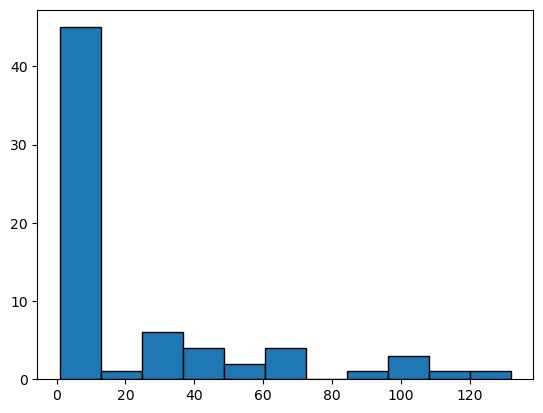

In [457]:
plt.hist(chromosome_counts,bins=11,edgecolor='k')


(array([7., 0., 0., 6., 0., 0., 3., 0., 0., 1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

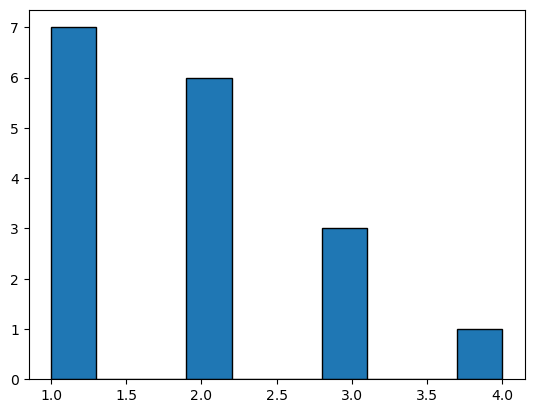

In [458]:
cluster_chr=CoTE_df['chr'].value_counts()
plt.hist(cluster_chr,edgecolor='k')

Visually do not follow normal distribution, should use a non-parametric test instead

# Perform Mann-Whitney U-test

In [ ]:
#This function return chromosome that has significant difference between the number of TEs and number of CoTEs
def compare_counts(TEs, CoTEs, chromosome_of_interest):
    # Subset data for the chosen chromosome
    group1 = TEs[TEs['chr'] == chromosome_of_interest]['start']
    group2 = CoTEs[CoTEs['chr'] == chromosome_of_interest]['start']

    # Perform Mann-Whitney U test
    if(len(group2)!=0):
        try:
            statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
            if(p_value<=0.05):
                return {'chr': chromosome_of_interest, 'p_value': p_value}
        except ValueError:#when the sample sizes are too small
            print(f"Invalid test for chromosome {chromosome_of_interest}")
            return None
    else:#if there is no cluster on the chromosome
        return {'chr':chromosome_of_interest,'p_value':'NA'}

In [ ]:
unique_elements = TEs_df['chr'].unique()

In [ ]:
results_m=[]
for i in unique_elements:
    result=compare_counts(TEs_df,CoTE_df,i)
    if(result != None):
        results_m.append(result)
results_df_m = pd.DataFrame(results_m)


In [ ]:
results_df_m

In [ ]:
len(results_df_m[results_df_m['p_value']!='NA'])

In [ ]:
results_df_m[results_df_m['p_value']!='NA']

In [ ]:
len(unique_elements)

# Perform KS test

In [ ]:
#This function return chromosome that has significant difference between the number of TEs and number of CoTEs
def compare_counts_ks(TEs, CoTEs, chromosome_of_interest):
    # Subset data for the chosen chromosome
    group1 = TEs[TEs['chr'] == chromosome_of_interest]['start']
    group2 = CoTEs[CoTEs['chr'] == chromosome_of_interest]['start']
    print(chromosome_of_interest)
    # Perform KS test
    if(len(group2)!=0):
        try:
            statistic, p_value = kstest(group1, group2, alternative='two-sided')
            print(p_value)
            if(p_value<=0.05):
                return {'chr': chromosome_of_interest, 'p_value': p_value}
        except ValueError:#when the sample sizes are too small
            print(f"Invalid test for chromosome {chromosome_of_interest}")
            return None
    else:#if there is no cluster on the chromosome
       # print(len(group2))
        return {'chr':chromosome_of_interest,'p_value':'NA'}

In [ ]:
group2 = CoTE_df[CoTE_df['chr'] == 'chr1']['start']

In [ ]:
len(group2)

In [ ]:
results=[]
for i in unique_elements:
    result=compare_counts_ks(TEs_df,CoTE_df,i)
    if(result != None):
        results.append(result)
results_df = pd.DataFrame(results)

In [ ]:
results_df

In [ ]:
results_df[results_df['p_value']!='NA']

# Visualization

Plot bar graph to visualize the differences between the number of TEs and CoTEs on different chromosome.

In [468]:
def visualize(TEs,CoTEs,chromosomes):
    bar_TEs=[]
    bar_CoTEs=[]
    total_TEs=len(TEs)
    total_CoTEs=len(CoTEs)
    for chromosome in chromosomes:
        num_TEs= len(TEs[TEs['chr'] == chromosome])
        percent_TE=num_TEs/total_TEs
        bar_TEs.append(percent_TE)
        num_CoTEs=len(CoTEs[CoTEs['chr'] == chromosome])
        percent_CoTEs=num_CoTEs/total_CoTEs
        bar_CoTEs.append(percent_CoTEs)
    bar_width = 0.4
    index = np.arange(len(chromosomes))

    fig, ax = plt.subplots(figsize=(12, 8))

    cotes_bars = ax.bar(index , bar_CoTEs, bar_width, label='CoTEs')
    tes_bars = ax.bar(index+bar_width , bar_TEs, bar_width, label='TEs')

    ax.set_xlabel('Chromosomes')
    ax.set_ylabel('Percentage')
    ax.set_title('MER65A')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(chromosomes, rotation=60, ha='right')
    ax.legend()

    plt.show()
    return bar_CoTEs,bar_TEs

In [469]:
unique_chr=['chr1','ch2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX','chrY']

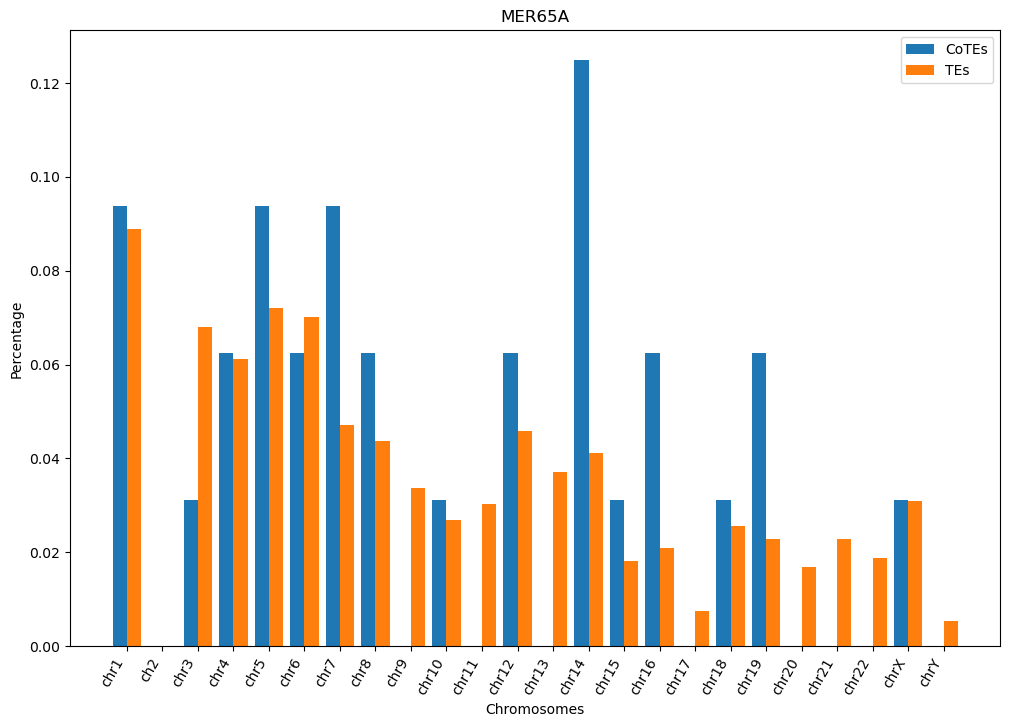

In [470]:
per_CoTEs,per_TEs=visualize(TEs_df,CoTE_df,unique_chr)

In [462]:
df = pd.DataFrame({'chr': unique_chr, 'TEs': per_TEs, 'CoTEs': per_CoTEs,'difference':[x - y for x, y in zip(per_TEs, per_CoTEs)]})

In [463]:
df

chr       TEs    CoTEs  difference
0    chr1  0.088889  0.09375   -0.004861
1     ch2  0.000000  0.00000    0.000000
2    chr3  0.068013  0.03125    0.036763
3    chr4  0.061279  0.06250   -0.001221
4    chr5  0.072054  0.09375   -0.021696
5    chr6  0.070034  0.06250    0.007534
6    chr7  0.047138  0.09375   -0.046612
7    chr8  0.043771  0.06250   -0.018729
8    chr9  0.033670  0.00000    0.033670
9   chr10  0.026936  0.03125   -0.004314
10  chr11  0.030303  0.00000    0.030303
11  chr12  0.045791  0.06250   -0.016709
12  chr13  0.037037  0.00000    0.037037
13  chr14  0.041077  0.12500   -0.083923
14  chr15  0.018182  0.03125   -0.013068
15  chr16  0.020875  0.06250   -0.041625
16  chr17  0.007407  0.00000    0.007407
17  chr18  0.025589  0.03125   -0.005661
18  chr19  0.022896  0.06250   -0.039604
19  chr20  0.016835  0.00000    0.016835
20  chr21  0.022896  0.00000    0.022896
21  chr22  0.018855  0.00000    0.018855
22   chrX  0.030976  0.03125   -0.000274
23   chrY  0.005387  0.00000    0.005387

(array([1., 0., 0., 3., 0., 4., 6., 3., 3., 4.]),
 array([-0.08392256, -0.0718266 , -0.05973064, -0.04763468, -0.03553872,
        -0.02344276, -0.0113468 ,  0.00074916,  0.01284512,  0.02494108,
         0.03703704]),
 <BarContainer object of 10 artists>)

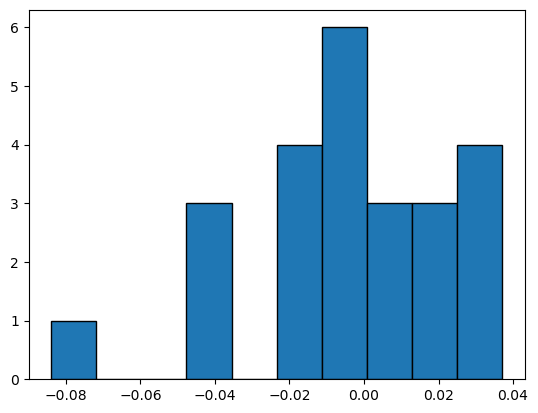

In [464]:
plt.hist(df['difference'],edgecolor='k')

# Find outliers

In [465]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [466]:
outliers=find_outliers_IQR(df['difference'])
selected_rows = df.iloc[outliers.index]

In [467]:
selected_rows #negative: clusters take up more proportion

chr       TEs  CoTEs  difference
13  chr14  0.041077  0.125   -0.083923

# Chi-squared test

In [261]:
def make_count_table(TEs, CoTEs, chromosomes):
    filtered_df = TEs[TEs['chr'].isin(chromosomes)]

    # Get the frequency of values in the 'chr' column
    chromosome_counts_TE = filtered_df['chr'].value_counts()
    filtered_df_c = CoTEs[CoTEs['chr'].isin(chromosomes)]

    # Get the frequency of values in the 'chr' column
    chromosome_counts_CoTE = filtered_df_c['chr'].value_counts()
    return chromosome_counts_TE, chromosome_counts_CoTE

In [262]:
TE_counts,CoTE_counts=make_count_table(TEs_df,CoTE_df,unique_chr)